In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/mnist_train.csv")

In [5]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [6]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [7]:
split=int(0.8*X.shape[0])
print(split)

48000


In [8]:
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


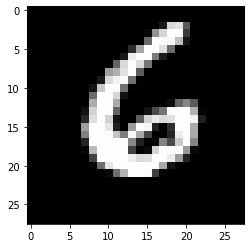

6


In [17]:
#Visualize some sample

def draw_img(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
draw_img(X_train[90])
print(Y_train[90])

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
X_ = sc.fit_transform(X)

In [15]:
X_.shape

(60000, 784)

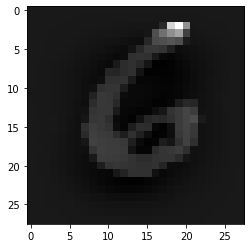

In [16]:
plt.imshow(X_[90].reshape(28,28) , cmap="gray")

# Sklearn PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
Z_pca = pca.fit_transform(X_)

In [21]:
Z_pca.shape

(60000, 2)

In [22]:
Z_pca

array([[-0.92204773, -4.81495527],
       [ 8.70905867, -7.75472052],
       [ 2.32824562,  9.43194578],
       ...,
       [-3.77718881, -3.23046023],
       [ 1.72252476, -4.94856518],
       [-1.42727369, -6.17534805]])

In [23]:
pca.explained_variance_

array([40.48763509, 29.24169739])

# Custom PCA

In [24]:
# Step 2 - Computer Covar matrix

In [25]:
covar = np.dot(X_.T, X_)

In [26]:
covar.shape

(784, 784)

In [27]:
# Step - 3 Computer eigen vectors using SVD

In [28]:
from numpy.linalg import svd

In [29]:
U, S, V = svd(covar)

In [30]:
U.shape

(784, 784)

In [31]:
Ured = U[:, :2]

In [32]:
Ured.shape

(784, 2)

In [33]:
# Step 4 - Project of Data on New axis(Components)

In [34]:
Z = np.dot(X_, Ured)


In [35]:
Z.shape

(60000, 2)

In [37]:
Z

array([[-0.92215881, -4.81479035],
       [ 8.70897698, -7.75440302],
       [ 2.32838932,  9.43133817],
       ...,
       [-3.77721201, -3.23056436],
       [ 1.72236917, -4.94812525],
       [-1.42725062, -6.17538558]])

# Visualize Dataset

In [38]:
import pandas as pd

In [40]:
new_dataset = np.hstack((Z, Y.reshape(-1,1)))

In [41]:
dataframe = pd.DataFrame(new_dataset , columns=["PC1", "PC2", "label"])

In [42]:
dataframe.head()

,PC1,PC2,label
0,-0.922159,-4.814790,5.0
1,8.708977,-7.754403,0.0
2,2.328389,9.431338,4.0
3,-6.582173,-3.746318,1.0
4,-5.183251,3.133297,9.0


<Figure size 1080x1080 with 0 Axes>

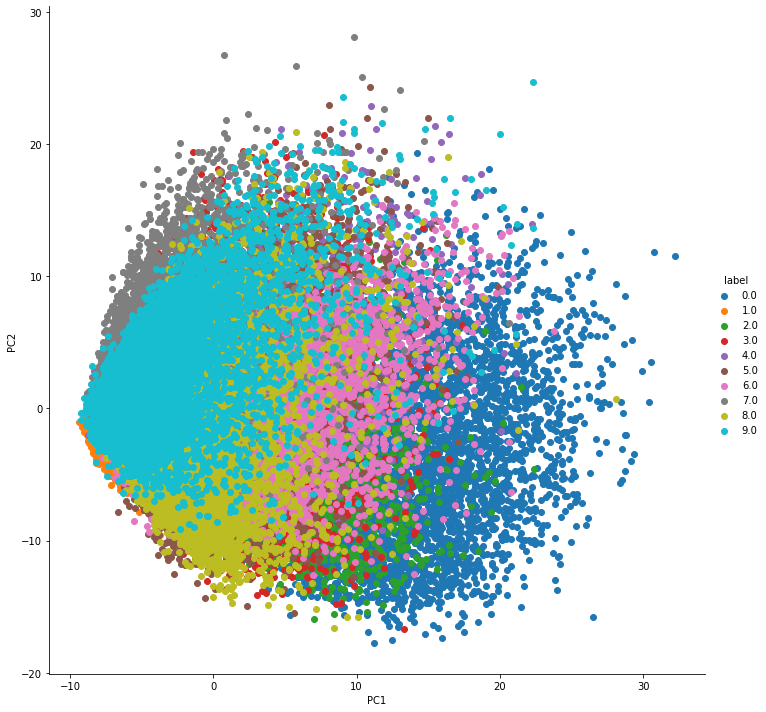

In [43]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

# PCA with 784

In [44]:
pca = PCA()

In [45]:
Z_pca= pca.fit_transform(X_)

In [46]:
Z_pca.shape

(60000, 784)

In [47]:
cum_var_exaplined = np.cumsum(pca.explained_variance_ratio_)

In [48]:
cum_var_exaplined

array([0.05646717, 0.09724989, 0.13464369, 0.16349484, 0.18870593,
       0.21064863, 0.22988207, 0.24734006, 0.26269099, 0.27670818,
       0.29012561, 0.30216303, 0.31330873, 0.32420796, 0.33449446,
       0.34443932, 0.35380315, 0.36301361, 0.37194798, 0.3806471 ,
       0.38892074, 0.39695491, 0.40460336, 0.41202109, 0.41917402,
       0.42609249, 0.43293384, 0.43950059, 0.44581736, 0.45194656,
       0.45790911, 0.46378627, 0.46950219, 0.47512526, 0.48067208,
       0.48605627, 0.49136809, 0.49656415, 0.50164626, 0.50644631,
       0.51121087, 0.51590227, 0.52044576, 0.52495921, 0.52942885,
       0.53386268, 0.53824483, 0.54254865, 0.54681743, 0.5510539 ,
       0.55510086, 0.55909534, 0.5630699 , 0.56700811, 0.57086624,
       0.57465667, 0.57841069, 0.58211845, 0.5857679 , 0.5893609 ,
       0.59288472, 0.59636266, 0.59980677, 0.60320546, 0.606565  ,
       0.60991386, 0.6132325 , 0.61646276, 0.61962553, 0.62275797,
       0.62586528, 0.62893771, 0.63198685, 0.63501403, 0.63800

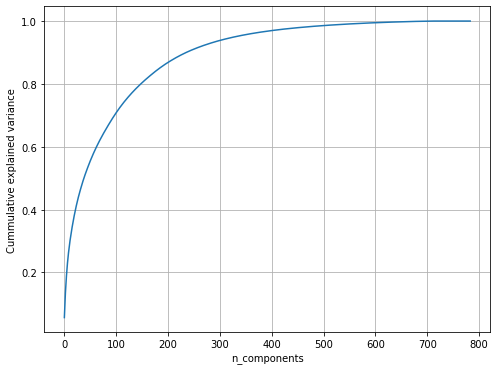

In [49]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_exaplined)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()